In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as xrio
import geopandas as gpd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


np.set_printoptions(linewidth=200)

<h1>Rain</h1>

In [2]:
rain_data = xrio.open_rasterio("data2\\annual_rain.tif")

print(rain_data)
rain_data

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        2824.7434082031
    STATISTICS_MEAN:           498.79483239204
    STATISTICS_MINIMUM:        163.73666381836
    STATISTICS_STDDEV:         271.78600853487
    STATISTICS_VALID_PERCENT:  81.55
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0


<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        2824.7434082031
    STATISTICS_MEAN:           498.79483239204
    STATISTICS_MINIMUM:        163.73666381836
    STATISTICS_STDDEV:         271.78600853487
    STATISTICS_VALID_PERCENT:  81.55
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0

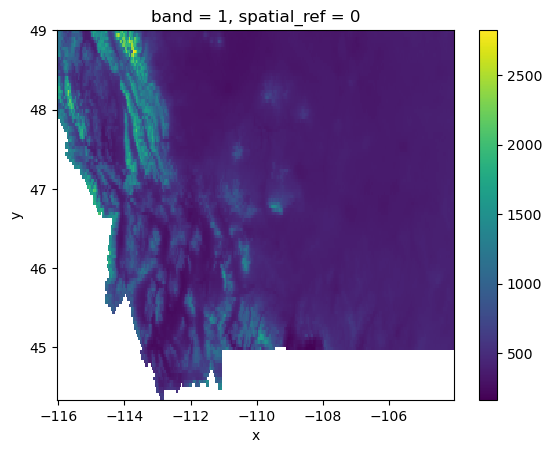

In [3]:
rain_data.plot()

<h1>Temp</h1>

In [4]:
tmin_data = xrio.open_rasterio("data2\\annual_tmin.tif")
print(tmin_data)
# tmin_data

tmax_data = xrio.open_rasterio("data2\\annual_tmin.tif")
print(tmax_data)
# tmax_data

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        276.67013549805
    STATISTICS_MEAN:           272.32652699707
    STATISTICS_MINIMUM:        263.47247314453
    STATISTICS_STDDEV:         1.4713366231669
    STATISTICS_VALID_PERCENT:  81.53
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0
<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
  

In [5]:
#K to F
data_fahrenheit_min = (tmin_data - 273.15) * 9/5 + 32

data_fahrenheit_min.attrs = tmin_data.attrs
data_fahrenheit_min.attrs['units'] = 'Fahrenheit'

# data_fahrenheit_min


data_fahrenheit_max = (tmax_data - 273.15) * 9/5 + 32

data_fahrenheit_max.attrs = tmax_data.attrs
data_fahrenheit_max.attrs['units'] = 'Fahrenheit'

# data_fahrenheit_max

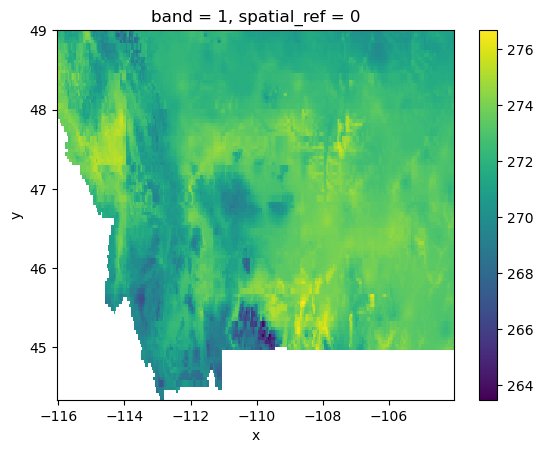

In [6]:
tmin_data.plot()

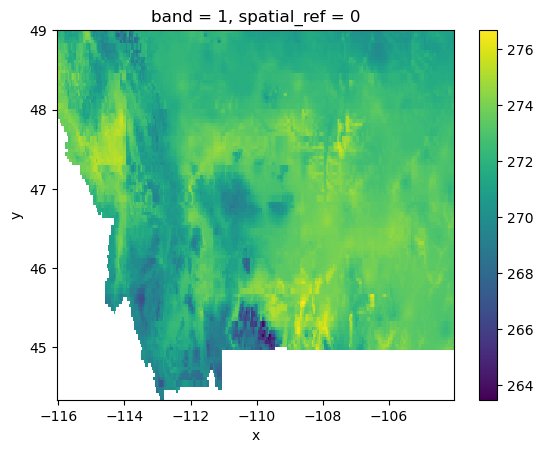

In [7]:
tmax_data.plot()

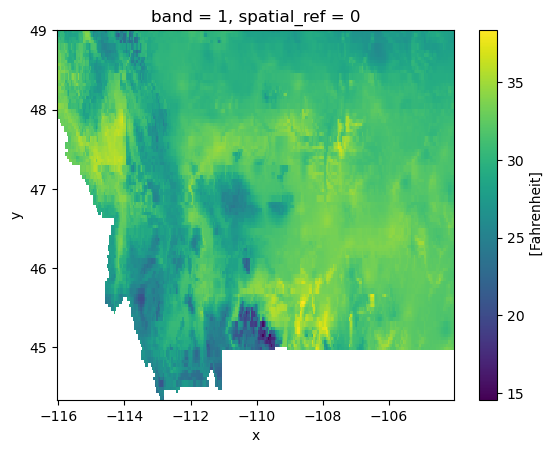

In [8]:
data_fahrenheit_max.plot()

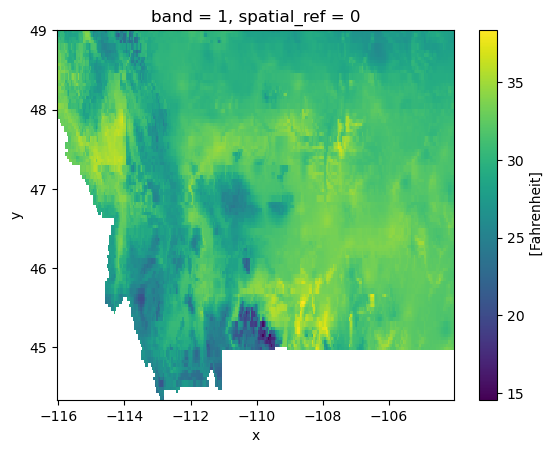

In [9]:
data_fahrenheit_min.plot()

In [10]:
tcomb_data = (data_fahrenheit_min + data_fahrenheit_max)/2
tcomb_data

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
array([[[30.287395, 29.181732, 29.8146  , ..., 27.95725 , 27.870295, 27.825085],
        [29.936987, 28.976452, 30.360235, ..., 27.847279, 27.77658 , 27.727636],
        [30.298054, 30.198406, 29.884144, ..., 27.7651  , 27.68847 , 27.631725],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,       nan],
        [      nan,       nan,       nan, ...,       nan,       nan,       nan],
        [      nan,       nan,       nan, ...,       nan,       nan,       nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0

<h1>NDVI</h1>

In [11]:
ndvi_data = xrio.open_rasterio("data2\\ndvi_final.tif")

print(ndvi_data)
ndvi_data

<xarray.DataArray (band: 1, y: 110, x: 288)> Size: 127kB
[31680 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 880B 48.94 48.9 48.86 48.82 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0


<xarray.DataArray (band: 1, y: 110, x: 288)> Size: 127kB
[31680 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 880B 48.94 48.9 48.86 48.82 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

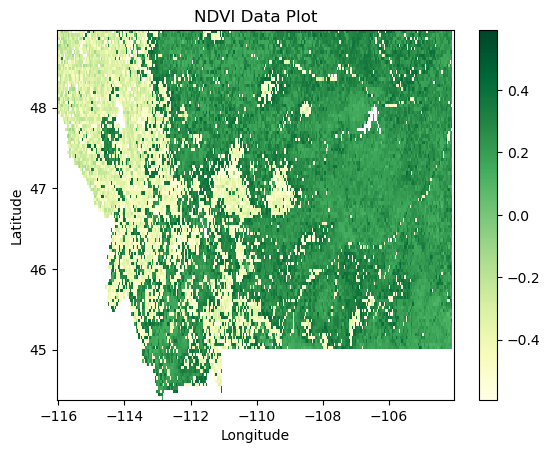

In [12]:
import matplotlib.pyplot as plt
import numpy as np

ndvi_data = ndvi_data.where(ndvi_data != ndvi_data.attrs['_FillValue'], np.nan)

ndvi_data.plot(x='x', y='y', cmap='YlGn')
plt.title("NDVI Data Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<h1>Pop Dens</h1>

In [13]:
pop_data = xrio.open_rasterio("data2\popdens.tif")

print(pop_data)
pop_data

<xarray.DataArray (band: 1, y: 111, x: 288)> Size: 128kB
[31968 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 888B 48.98 48.94 48.9 48.85 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.230102647606
    STATISTICS_VALID_PERCENT:  81.25
    _FillValue:                -3.402823e+38
    scale_factor:              1.0
    add_offset:                0.0


<xarray.DataArray (band: 1, y: 111, x: 288)> Size: 128kB
[31968 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 888B 48.98 48.94 48.9 48.85 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.230102647606
    STATISTICS_VALID_PERCENT:  81.25
    _FillValue:                -3.402823e+38
    scale_factor:              1.0
    add_offset:                0.0

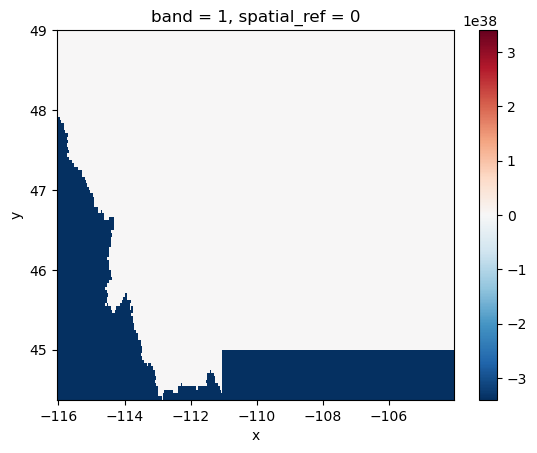

In [14]:
pop_data.plot()

In [15]:
print("Total non-NaN values in pop_data:", np.sum(~np.isnan(pop_data.values)))

Total non-NaN values in pop_data: 31968


c:\Users\Alex\anaconda3\envs\rast_env\Lib\site-packages\xarray\core\computation.py:818: RuntimeWarning: invalid value encountered in log1p
  result_data = func(*input_data)


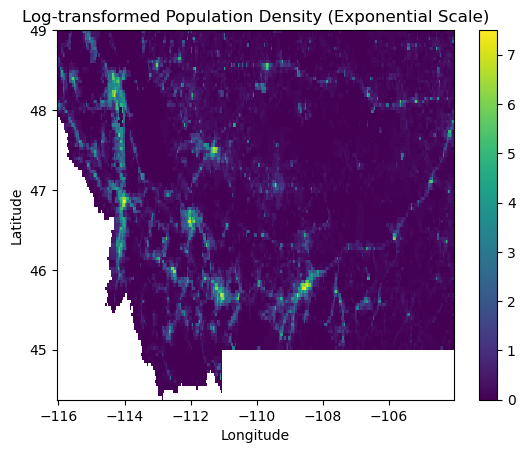

In [16]:
# Apply a logarithmic transformation to the data
# Adding a small value (e.g., 1) to avoid log(0) if there are zero values in the data
log_pop_data = np.log1p(pop_data)  # np.log1p is log(x + 1), safer for 0 values

# Plot the transformed data using a colormap
log_pop_data.plot(cmap='viridis', add_colorbar=True)

# Add titles and labels
plt.title("Log-transformed Population Density (Exponential Scale)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [17]:
log_pop_data

<xarray.DataArray (band: 1, y: 111, x: 288)> Size: 128kB
array([[[0.        , 0.        , 0.        , ..., 0.29844722, 0.11051268, 0.08366855],
        [0.00968505, 0.        , 0.        , ..., 0.17213586, 0.11854688, 0.12753466],
        [0.04897361, 0.02121452, 0.        , ..., 0.34497008, 0.16159612, 0.8752619 ],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 888B 48.98 48.94 48.9 48.85 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.230102647606
    STATISTICS_VALID_PERCENT:  81.25
    _FillValue:                -3.402823e+38
    scale_factor:              1.0
    add_offset:                0.0

In [18]:
print("Total non-NaN values in log_pop_data:", np.sum(~np.isnan(log_pop_data.values)))


Total non-NaN values in log_pop_data: 25975


<h1>Merge attempts</h1>

In [19]:
combined_data = xr.merge([
    ndvi_data.rename("ndvi"),
    tcomb_data.rename("tcomb"),
    rain_data.rename("rain")
])
combined_data

<xarray.Dataset> Size: 2MB
Dimensions:      (band: 1, x: 576, y: 222)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0
Data variables:
    ndvi         (band, y, x) float32 511kB nan nan nan nan ... nan nan nan nan
    tcomb        (band, y, x) float32 511kB nan nan nan nan ... 27.87 nan 27.83
    rain         (band, y, x) float32 511kB nan nan nan nan ... 392.0 nan 386.6
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

In [20]:
ndvi_data

<xarray.DataArray (band: 1, y: 110, x: 288)> Size: 127kB
array([[[ 0.3  , -0.444, -0.252, ...,  0.208,  0.36 ,    nan],
        [-0.3  , -0.38 , -0.264, ...,  0.204,  0.296,    nan],
        [-0.272, -0.248,    nan, ...,  0.248,  0.316,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 880B 48.94 48.9 48.86 48.82 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

<h1>Random Forest</h1>

In [21]:
import numpy as np
import xarray as xr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
# Extract data variables from the combined_dataset
ndvi_data2 = combined_data['ndvi'].squeeze()  # Remove the singleton 'band' dimension
tcomb_data2 = combined_data['tcomb'].squeeze()
rain_data2 = combined_data['rain'].squeeze()

In [23]:
ndvi_data2

<xarray.DataArray 'ndvi' (y: 222, x: 576)> Size: 511kB
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [ 0.3  ,    nan, -0.444, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

In [24]:
tcomb_data2

<xarray.DataArray 'tcomb' (y: 222, x: 576)> Size: 511kB
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [      nan, 29.936987,       nan, ..., 27.77658 ,       nan, 27.727636],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan, 30.287395,       nan, ..., 27.870295,       nan, 27.825085]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0

In [25]:
rain_data2

<xarray.DataArray 'rain' (y: 222, x: 576)> Size: 511kB
array([[       nan,        nan,        nan, ...,        nan,        nan,        nan],
       [       nan,        nan,        nan, ...,        nan,        nan,        nan],
       [       nan,        nan,        nan, ...,        nan,        nan,        nan],
       ...,
       [       nan, 1083.34   ,        nan, ...,  377.16666,        nan,  371.31332],
       [       nan,        nan,        nan, ...,        nan,        nan,        nan],
       [       nan,  990.07   ,        nan, ...,  391.97   ,        nan,  386.58334]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        2824.7434082031
    STATISTICS_MEAN:           498.79483239204
    STATISTICS_MINIMUM:        163.73666381836
    STATISTICS_STDDEV:         271.78600853487
    STATISTICS_VALID_PERCENT:  81.55
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0

ATT 5

In [26]:
#print shapes
print("NDVI Shape:", ndvi_data.shape)
print("Tcomb Shape:", tcomb_data.shape)
print("Rain Shape:", rain_data.shape)
print("Population Data Shape:", log_pop_data.shape)

NDVI Shape: (1, 110, 288)
Tcomb Shape: (1, 112, 288)
Rain Shape: (1, 112, 288)
Population Data Shape: (1, 111, 288)


In [27]:
# Interpolate all data to match the dimensions of Tcomb
target_shape = tcomb_data.shape

ndvi_data_resampled = ndvi_data.interp(y=tcomb_data.coords['y'])
log_pop_data_resampled = log_pop_data.interp(y=tcomb_data.coords['y'])
rain_data_resampled = rain_data.interp(y=tcomb_data.coords['y'])

In [28]:
#verify shapes
print("Resampled NDVI Shape:", ndvi_data_resampled.shape)
print("Resampled Population Shape:", log_pop_data_resampled.shape)
print("Resampled Rain Shape:", rain_data_resampled.shape)
print("Tcomb Shape:", tcomb_data.shape)

Resampled NDVI Shape: (1, 112, 288)
Resampled Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)
Tcomb Shape: (1, 112, 288)


In [29]:
# Flatten all data arrays
X2 = np.stack([ndvi_data_resampled.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_resampled.values.flatten()], axis=1)

# Flatten population data as target variable
y2 = log_pop_data_resampled.values.flatten()

# Remove NaN values from X and y for training
mask2 = ~np.isnan(y2)
X_train2 = X2[mask2]
y_train2 = y2[mask2]

# Verify the shapes of the training data
print("X2_train shape:", X_train2.shape)
print("y2_train shape:", y_train2.shape)

X2_train shape: (25665, 3)
y2_train shape: (25665,)


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

# Make predictions on the training data (you can use test data if available)
y_pred2 = model2.predict(X_train2)


print("R^2 Score:", r2_score(y_train2, y_pred2))
print("Number of predictions:", len(y_pred2))

R^2 Score: 0.8875699520990729
Number of predictions: 25665


In [31]:
# Create a full grid of NaNs (matching the desired target grid size)
prediction_grid2 = np.full((tcomb_data.shape[1], tcomb_data.shape[2]), np.nan)

# Check the size of the predictions
target_size2 = tcomb_data.shape[1] * tcomb_data.shape[2]


# Since len(y_pred) is smaller than target_size (31680 vs. 32256), we will pad with NaNs
if len(y_pred2) == target_size2:
    # If sizes match, reshape directly
    prediction_grid2 = y_pred2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])
else:
    # If sizes don't match, fill the prediction grid with values where possible
    print(f"Warning: Mismatch in array sizes. Expected {target_size2} values, but got {len(y_pred2)}.")
    # Flatten the prediction grid to insert the predictions
    prediction_grid_flat2 = prediction_grid2.flatten()
    
    # Insert the predictions where the mask allows
    prediction_grid_flat2[:len(y_pred2)] = y_pred2  # Insert only the available predictions
    
    # Reshape back to the target grid shape
    prediction_grid2 = prediction_grid_flat2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])

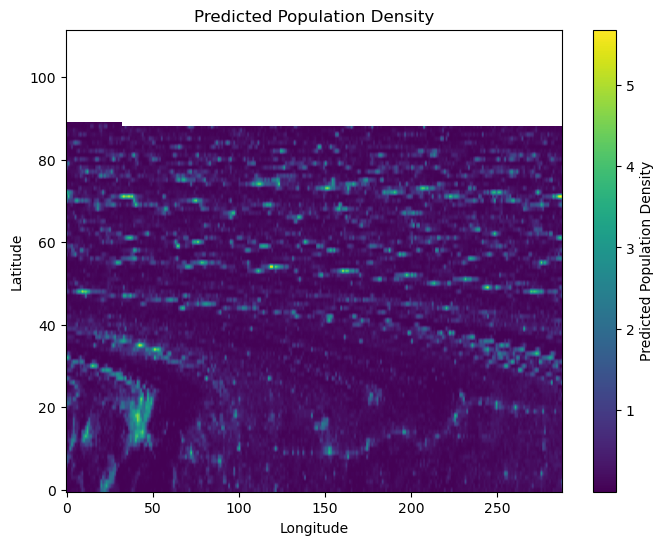

In [32]:
# Plot the flipped grid
plt.figure(figsize=(8, 6))
plt.imshow(prediction_grid2, cmap='viridis', origin='lower')  # 'lower' sets the origin to bottom-left
plt.colorbar(label='Predicted Population Density')
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust aspect ratio
plt.gca().set_aspect('auto')

plt.show()


In [33]:
feature_importances = model2.feature_importances_
features = ['NDVI', 'Tcomb', 'Rain']  # Adjust based on actual feature names

# Create a DataFrame for easier interpretation
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

  Feature  Importance
1   Tcomb    0.366884
2    Rain    0.329228
0    NDVI    0.303888


all

NDVI Shape: (1, 110, 288)
Tcomb Shape: (1, 112, 288)
Rain Shape: (1, 112, 288)
Population Data Shape: (1, 111, 288)
Resampled NDVI Shape: (1, 112, 288)
Resampled Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)
Tcomb Shape: (1, 112, 288)
X2_train shape: (25665, 3)
y2_train shape: (25665,)
R^2 Score: 0.8875699520990729
Number of predictions: 25665


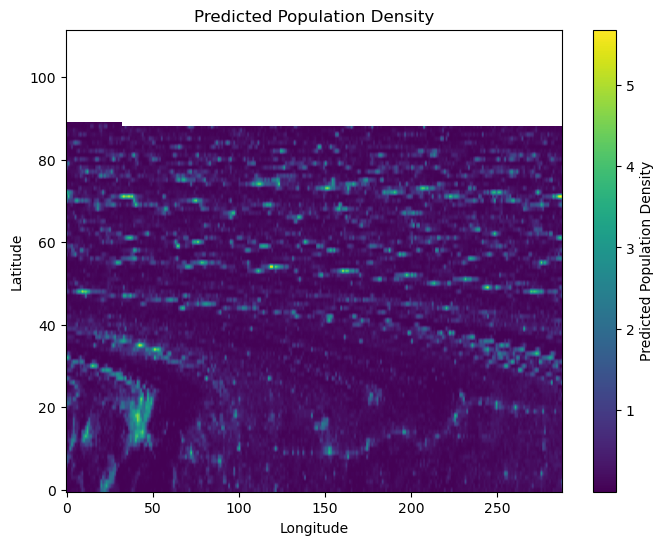

In [34]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Verify shapes
print("NDVI Shape:", ndvi_data.shape)
print("Tcomb Shape:", tcomb_data.shape)
print("Rain Shape:", rain_data.shape)
print("Population Data Shape:", log_pop_data.shape)

# Interpolate all data to match the dimensions of Tcomb
target_shape = tcomb_data.shape
ndvi_data_resampled = ndvi_data.interp(y=tcomb_data.coords['y'])
log_pop_data_resampled = log_pop_data.interp(y=tcomb_data.coords['y'])
rain_data_resampled = rain_data.interp(y=tcomb_data.coords['y'])

# Verify shapes after interpolation
print("Resampled NDVI Shape:", ndvi_data_resampled.shape)
print("Resampled Population Shape:", log_pop_data_resampled.shape)
print("Resampled Rain Shape:", rain_data_resampled.shape)
print("Tcomb Shape:", tcomb_data.shape)

# Flatten all data arrays
X2 = np.stack([ndvi_data_resampled.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_resampled.values.flatten()], axis=1)

# Flatten population data as target variable
y2 = log_pop_data_resampled.values.flatten()

# Remove NaN values from X and y for training
mask2 = ~np.isnan(y2)
X_train2 = X2[mask2]
y_train2 = y2[mask2]

# Verify the shapes of the training data
print("X2_train shape:", X_train2.shape)
print("y2_train shape:", y_train2.shape)

# Initialize the Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

# Make predictions on the training data (you can use test data if available)
y_pred2 = model2.predict(X_train2)

print("R^2 Score:", r2_score(y_train2, y_pred2))
print("Number of predictions:", len(y_pred2))

# Ensure that we handle NaNs in the grid and the predictions
prediction_grid2 = np.full((tcomb_data.shape[1], tcomb_data.shape[2]), np.nan)

# Check the size of the predictions
target_size2 = tcomb_data.shape[1] * tcomb_data.shape[2]

# Ensure we match the prediction size and handle the mismatch
if len(y_pred2) == target_size2:
    # If sizes match, reshape directly
    prediction_grid2 = y_pred2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])
else:
    # If sizes don't match, pad with NaNs
    print(f"Warning: Mismatch in array sizes. Expected {target_size2} values, but got {len(y_pred2)}.")
    
    # Flatten the prediction grid
    prediction_grid_flat2 = prediction_grid2.flatten()

    # Insert only the available predictions (we only have 25665 predictions)
    prediction_grid_flat2[:len(y_pred2)] = y_pred2  # Insert the available predictions

    # Reshape the prediction grid back to match the target grid shape
    prediction_grid2 = prediction_grid_flat2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])

# Plot the prediction grid with the flipped origin
plt.figure(figsize=(8, 6))
plt.imshow(prediction_grid2, cmap='viridis', origin='lower')  # 'lower' sets the origin to bottom-left
plt.colorbar(label='Predicted Population Density')
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust aspect ratio
plt.gca().set_aspect('auto')

plt.show()


tttt

In [35]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Verify shapes
print("NDVI Shape:", ndvi_data.shape)
print("Tcomb Shape:", tcomb_data.shape)
print("Rain Shape:", rain_data.shape)
print("Population Data Shape:", log_pop_data.shape)

# Interpolate all data to match the dimensions of Tcomb
target_shape = tcomb_data.shape
ndvi_data_resampled = ndvi_data.interp(y=tcomb_data.coords['y'])
log_pop_data_resampled = log_pop_data.interp(y=tcomb_data.coords['y'])
rain_data_resampled = rain_data.interp(y=tcomb_data.coords['y'])

# Verify shapes after interpolation
print("Resampled NDVI Shape:", ndvi_data_resampled.shape)
print("Resampled Population Shape:", log_pop_data_resampled.shape)
print("Resampled Rain Shape:", rain_data_resampled.shape)
print("Tcomb Shape:", tcomb_data.shape)

NDVI Shape: (1, 110, 288)
Tcomb Shape: (1, 112, 288)
Rain Shape: (1, 112, 288)
Population Data Shape: (1, 111, 288)
Resampled NDVI Shape: (1, 112, 288)
Resampled Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)
Tcomb Shape: (1, 112, 288)


In [36]:
tcomb_data

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
array([[[30.287395, 29.181732, 29.8146  , ..., 27.95725 , 27.870295, 27.825085],
        [29.936987, 28.976452, 30.360235, ..., 27.847279, 27.77658 , 27.727636],
        [30.298054, 30.198406, 29.884144, ..., 27.7651  , 27.68847 , 27.631725],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,       nan],
        [      nan,       nan,       nan, ...,       nan,       nan,       nan],
        [      nan,       nan,       nan, ...,       nan,       nan,       nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0

In [37]:
# Check the type of tcomb_data (should be xarray.DataArray)
print(type(tcomb_data))

# Convert the DataArray to a DataFrame
tcomb_df = tcomb_data.to_dataframe(name="temperature").reset_index()

# Show the DataFrame
print(tcomb_df)


<class 'xarray.core.dataarray.DataArray'>
       band          y           x  spatial_ref  temperature
0         1  48.983333 -116.016667            0    30.287395
1         1  48.983333 -115.975000            0    29.181732
2         1  48.983333 -115.933333            0    29.814600
3         1  48.983333 -115.891667            0    30.186817
4         1  48.983333 -115.850000            0    30.186817
...     ...        ...         ...          ...          ...
32251     1  44.358333 -104.225000            0          NaN
32252     1  44.358333 -104.183333            0          NaN
32253     1  44.358333 -104.141667            0          NaN
32254     1  44.358333 -104.100000            0          NaN
32255     1  44.358333 -104.058333            0          NaN

[32256 rows x 5 columns]


X2_train shape: (25665, 3)
y2_train shape: (25665,)
R^2 Score: 0.8875699520990729
Number of predictions: 25665


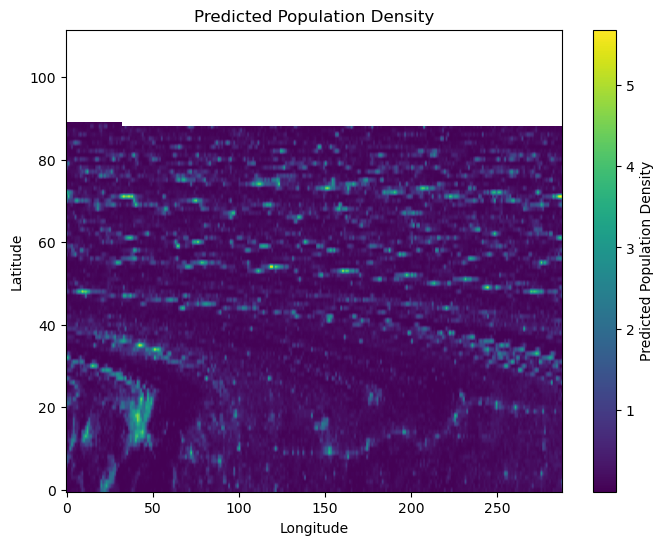

In [38]:


# Flatten all data arrays
X2 = np.stack([ndvi_data_resampled.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_resampled.values.flatten()], axis=1)

# Flatten population data as target variable
y2 = log_pop_data_resampled.values.flatten()

# Remove NaN values from X and y for training
mask2 = ~np.isnan(y2)
X_train2 = X2[mask2]
y_train2 = y2[mask2]

# Verify the shapes of the training data
print("X2_train shape:", X_train2.shape)
print("y2_train shape:", y_train2.shape)

# Initialize the Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

# Make predictions on the training data (you can use test data if available)
y_pred2 = model2.predict(X_train2)

print("R^2 Score:", r2_score(y_train2, y_pred2))
print("Number of predictions:", len(y_pred2))

# Ensure that we handle NaNs in the grid and the predictions
prediction_grid2 = np.full((tcomb_data.shape[1], tcomb_data.shape[2]), np.nan)

# Check the size of the predictions
target_size2 = tcomb_data.shape[1] * tcomb_data.shape[2]

# Ensure we match the prediction size and handle the mismatch
if len(y_pred2) == target_size2:
    # If sizes match, reshape directly
    prediction_grid2 = y_pred2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])
else:
    # If sizes don't match, pad with NaNs
    print(f"Warning: Mismatch in array sizes. Expected {target_size2} values, but got {len(y_pred2)}.")
    
    # Flatten the prediction grid
    prediction_grid_flat2 = prediction_grid2.flatten()

    # Insert only the available predictions (we only have 25665 predictions)
    prediction_grid_flat2[:len(y_pred2)] = y_pred2  # Insert the available predictions

    # Reshape the prediction grid back to match the target grid shape
    prediction_grid2 = prediction_grid_flat2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])

# Plot the prediction grid with the flipped origin
plt.figure(figsize=(8, 6))
plt.imshow(prediction_grid2, cmap='viridis', origin='lower')  # 'lower' sets the origin to bottom-left
plt.colorbar(label='Predicted Population Density')
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust aspect ratio
plt.gca().set_aspect('auto')

plt.show()


In [39]:


print(type(y_pred2))
y_pred2.shape

<class 'numpy.ndarray'>


(25665,)

In [40]:
import numpy as np

# Check the number of non-NaN values in tcomb_data
non_nan_count = np.count_nonzero(~np.isnan(log_pop_data_resampled))
print("Non-NaN count in tcomb_data:", non_nan_count)

# Check the shape of y_pred2
print("y_pred2 shape:", y_pred2.shape[0])


Non-NaN count in tcomb_data: 25665
y_pred2 shape: 25665


In [41]:
import numpy as np
import xarray as xr

#copy dims of log_p_dens
new_xarray = log_pop_data_resampled.copy()

#find not nan locations
non_nan_indices = np.where(~np.isnan(log_pop_data_resampled.values))

#assign seqentially through p_dens since it follows orig pattern
new_xarray.values[non_nan_indices] = y_pred2

print(new_xarray)


<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 258kB
array([[[       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [0.15989108, 0.00211113, 0.02635924, ..., 0.21854192, 0.19247524, 0.35122386],
        [0.06711338, 0.02528581, 0.0188579 , ..., 0.29275156, 0.2731657 , 0.88749516],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
    spatial_ref  int64 8B 0
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.

In [42]:
non_nan_indices

(array([0, 0, 0, ..., 0, 0, 0]),
 array([  1,   1,   1, ..., 109, 109, 110]),
 array([ 0,  1,  2, ..., 75, 76, 76]))

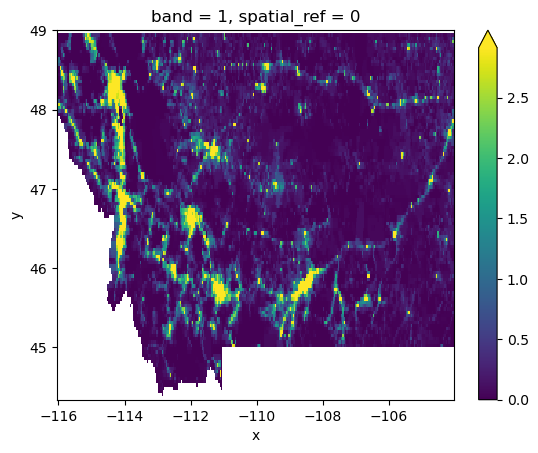

In [43]:
ax = log_pop_data_resampled.plot(
    robust=True,
    add_colorbar=True,
)

R^2 Score: 0.8875699520990729
Number of predictions: 25665


Text(0.5, 1.0, 'Predicted Population Density')

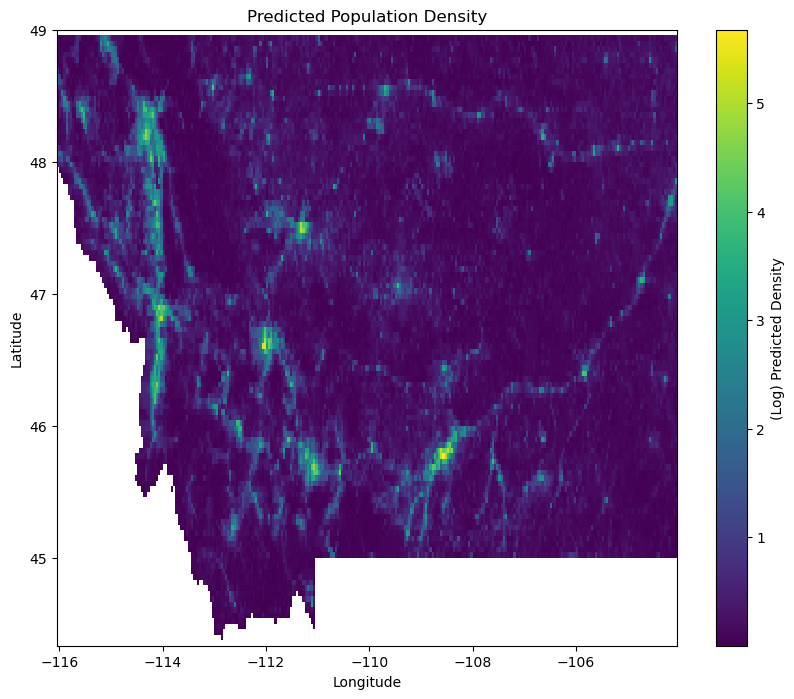

In [44]:
print("R^2 Score:", r2_score(y_train2, y_pred2))
print("Number of predictions:", len(y_pred2))

ax = new_xarray.plot(
    cmap='viridis',
    figsize=(10, 8),
    cbar_kwargs={'label': '(Log) Predicted Density'},
    # robust=True,
    add_colorbar=True,
)

ax = plt.gca()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Predicted Population Density')

aquifer stuff

In [45]:
import geopandas as gpd
water_path = 'data2\water\PrincipalAquifers_MT.shp'
water_gdf = gpd.read_file(water_path)

print("before:", water_gdf.crs)
water_gdf = water_gdf.to_crs(4269)
print("after:", water_gdf.crs)

before: EPSG:32100
after: EPSG:4269


In [46]:
fitlered_water = water_gdf[
    (water_gdf["hg_name"] != 'Water') &
    (water_gdf["hg_desc"] != 'Includes waterbodies: rivers, streams, lakes, reservoirs, canals, etc.') &
    (water_gdf["hg_type"] == 'In western Montana: Unconfined surficial aquifers with semi-confined to confined aquifers in deep basin-fill. In eastern Montana: generally unconfined.')
]

print(fitlered_water)

    COUNT  FID_1 HG_Code   ID  HG_ID MT_500_hg  \
13    9.0     11      Qs  1.0    1.0        Qs   

                                      hg_name                   hg_age  \
13  Cenozoic Basin Fill and Alluvium Aquifers  Quaternary and Tertiary   

                                              hg_type  ObjectID    Shape_Leng  \
13  In western Montana: Unconfined surficial aquif...         1  9.108728e+07   

      Shape_Le_1    Shape_Area  \
13  9.108728e+07  4.765351e+10   

                                              hg_desc  \
13  Basin-fill aquifers: Western Montana intermont...   

                                             geometry  
13  MULTIPOLYGON (((-112.15645 44.57744, -112.1566...  


<Axes: >

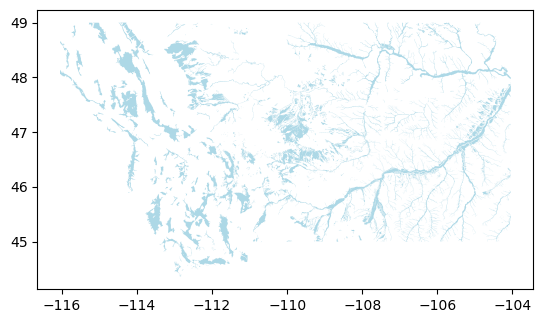

In [47]:
fitlered_water.plot(color='lightblue')

<class 'numpy.ndarray'>


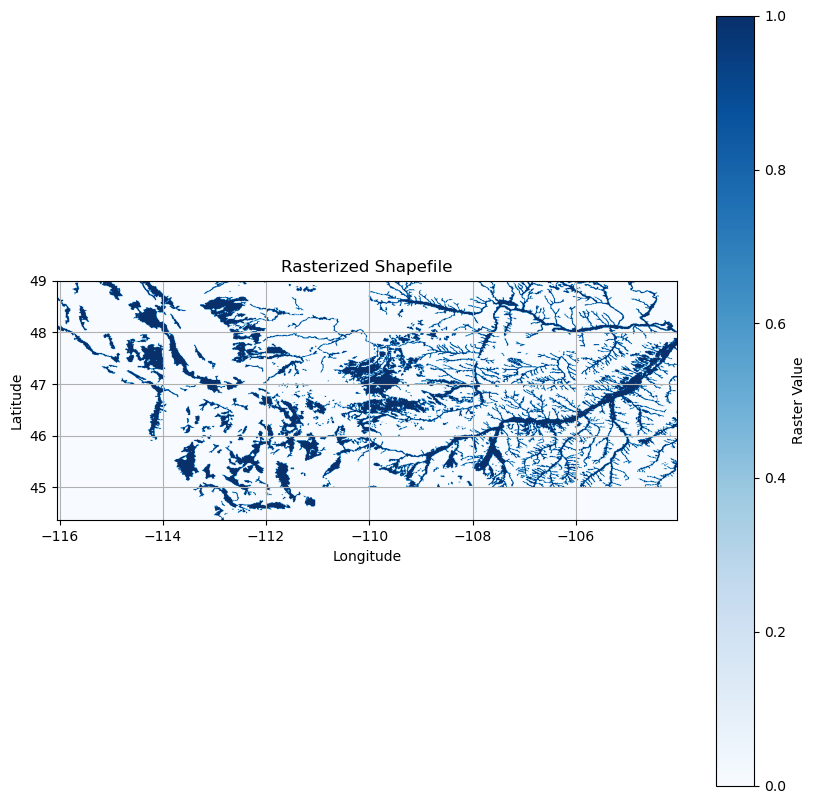

In [48]:
#rasterize
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin
import matplotlib.pyplot as plt
import numpy as np

# Define the grid resolution
grid_size = 0.01
# Get bounds of the geometries
minx, miny, maxx, maxy = fitlered_water.total_bounds

# Create the transform for the raster
transform = from_origin(minx, maxy, grid_size, grid_size)  # top-left corner, x and y resolution

# Calculate the shape of the raster (number of rows and columns)
width = int((maxx - minx) / grid_size)
height = int((maxy - miny) / grid_size)

# Create an empty raster
# Assuming you have already defined your transform and dimensions
water_raster = rasterize(
    [(geom, 1) for geom in fitlered_water.geometry],  # Using 1 for the water areas
    out_shape=(height, width),  # Specify the output shape
    transform=transform,
    fill=0,  # Fill value
    all_touched=True  # Include all touched pixels
)

print(type(water_raster))


# Plot the raster
plt.figure(figsize=(10, 10))
plt.imshow(water_raster, cmap='Blues', extent=(minx, maxx, miny, maxy))
plt.colorbar(label='Raster Value')
plt.title('Rasterized Shapefile')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [49]:
#and then save this as a raster
water = xrio.open_rasterio("data2\water\water_raster_file.tif")

print(water)
water

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.46 44.42 44.38
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0.0
    scale_factor:   1.0
    add_offset:     0.0


<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.46 44.42 44.38
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0.0
    scale_factor:   1.0
    add_offset:     0.0

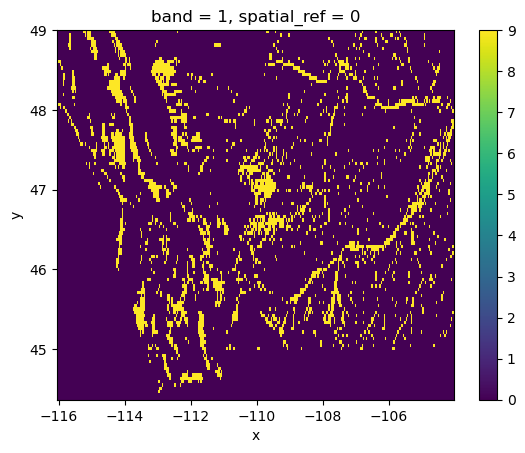

In [50]:
water.plot()

<h1>Adding water locations to random forest</h1>

In [51]:
print("Aquifer Shape:", water.shape)

water_resampled = water.interp(y=water.coords['y'])

Aquifer Shape: (1, 112, 288)


In [52]:
# Verify shapes after interpolation
print("Resampled NDVI Shape:", ndvi_data_resampled.shape)
print("Resampled Population Shape:", log_pop_data_resampled.shape)
print("Resampled Rain Shape:", rain_data_resampled.shape)
print("Resampled Aquifer Shape:", water_resampled.shape)
print("Tcomb Shape:", tcomb_data.shape)

Resampled NDVI Shape: (1, 112, 288)
Resampled Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)
Resampled Aquifer Shape: (1, 112, 288)
Tcomb Shape: (1, 112, 288)


X3_train shape: (25665, 4)
y3_train shape: (25665,)
R^2 Score: 0.8942634400797438
Number of predictions: 25665


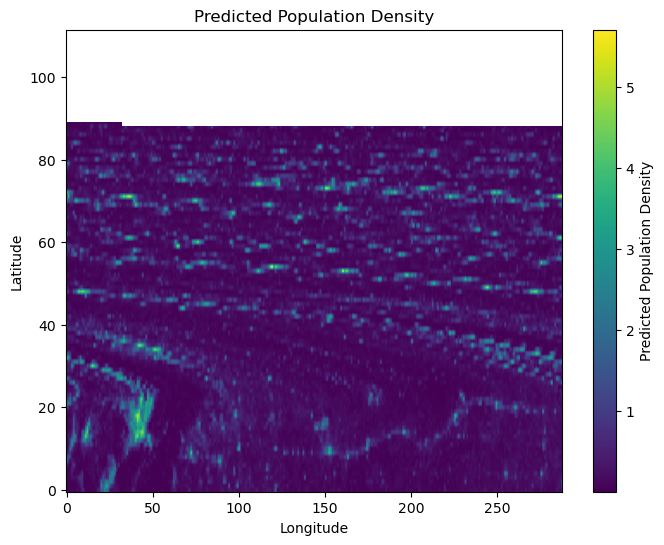

In [53]:
# Flatten all data arrays
X3 = np.stack([ndvi_data_resampled.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_resampled.values.flatten(),
              water_resampled.values.flatten()], axis=1)

# Flatten population data as target variable
y3 = log_pop_data_resampled.values.flatten()

# Remove NaN values from X and y for training
mask3 = ~np.isnan(y3)
X_train3 = X3[mask3]
y_train3 = y3[mask3]

# Verify the shapes of the training data
print("X3_train shape:", X_train3.shape)
print("y3_train shape:", y_train3.shape)

# Initialize the Random Forest Regressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model3.fit(X_train3, y_train3)

# Make predictions on the training data (you can use test data if available)
y_pred3 = model3.predict(X_train3)

print("R^2 Score:", r2_score(y_train3, y_pred3))
print("Number of predictions:", len(y_pred3))

# Ensure that we handle NaNs in the grid and the predictions
prediction_grid3 = np.full((tcomb_data.shape[1], tcomb_data.shape[2]), np.nan)

# Check the size of the predictions
target_size3 = tcomb_data.shape[1] * tcomb_data.shape[2]

# Ensure we match the prediction size and handle the mismatch
if len(y_pred3) == target_size3:
    # If sizes match, reshape directly
    prediction_grid3 = y_pred3.reshape(tcomb_data.shape[1], tcomb_data.shape[2])
else:
    # If sizes don't match, pad with NaNs
    print(f"Warning: Mismatch in array sizes. Expected {target_size3} values, but got {len(y_pred2)}.")
    
    # Flatten the prediction grid
    prediction_grid_flat3 = prediction_grid3.flatten()

    # Insert only the available predictions (we only have 25665 predictions)
    prediction_grid_flat3[:len(y_pred3)] = y_pred3  # Insert the available predictions

    # Reshape the prediction grid back to match the target grid shape
    prediction_grid3 = prediction_grid_flat3.reshape(tcomb_data.shape[1], tcomb_data.shape[2])

# Plot the prediction grid with the flipped origin
plt.figure(figsize=(8, 6))
plt.imshow(prediction_grid3, cmap='viridis', origin='lower')  # 'lower' sets the origin to bottom-left
plt.colorbar(label='Predicted Population Density')
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust aspect ratio
plt.gca().set_aspect('auto')

plt.show()


In [54]:
import numpy as np
import xarray as xr

#copy dims of log_p_dens
new_xarray3 = log_pop_data_resampled.copy()

#find not nan locations
non_nan_indices = np.where(~np.isnan(log_pop_data_resampled.values))

#assign seqentially through p_dens since it follows orig pattern
new_xarray3.values[non_nan_indices] = y_pred3

print(new_xarray3)

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 258kB
array([[[       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [0.15039082, 0.02162301, 0.02659353, ..., 0.2252275 , 0.1940546 , 0.48191532],
        [0.03300571, 0.02850233, 0.03521195, ..., 0.32144153, 0.32335806, 0.88830583],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
    spatial_ref  int64 8B 0
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.

R^2 Score: 0.8942634400797438
Number of predictions: 25665
Feature Importances:
NDVI: 0.3030
Temperature: 0.3441
Rainfall: 0.2737
Aquifers: 0.0793


Text(0.5, 1.0, 'Predicted Population Density')

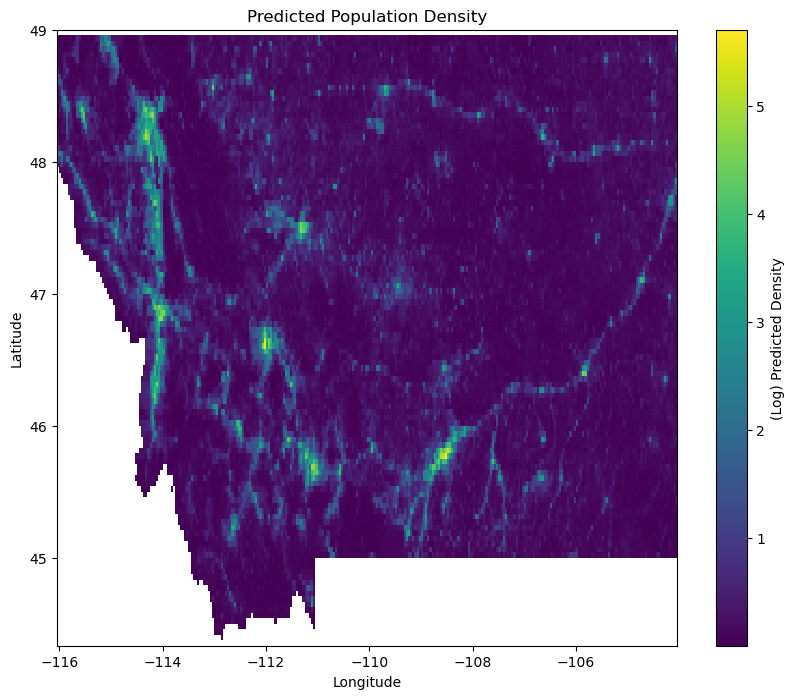

In [55]:
print("R^2 Score:", r2_score(y_train3, y_pred3))
print("Number of predictions:", len(y_pred3))

feat_names3 = ["NDVI", "Temperature", "Rainfall", "Aquifers"]
feature_importances3 = model3.feature_importances_
print("Feature Importances:")
for name, importance in zip(feat_names3, feature_importances3):
    print(f"{name}: {importance:.4f}")
ax3 = new_xarray3.plot(
    cmap='viridis',
    figsize=(10, 8),
    cbar_kwargs={'label': '(Log) Predicted Density'},
    # robust=True,
    add_colorbar=True,
)

ax3 = plt.gca()
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_title('Predicted Population Density')

In [56]:
#find not nan locations
non_nan_indices = np.where(~np.isnan(log_pop_data_resampled.values))


tetsts

In [57]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define a smaller training area (e.g., by slicing the data)
small_area_mask = (slice(0, 100), slice(0, 100))  # Example: use top-left 100x100 region

# Create a smaller subset for training
X4_small = np.stack([ndvi_data_resampled.values[small_area_mask].flatten(), 
                     tcomb_data.values[small_area_mask].flatten(), 
                     rain_data_resampled.values[small_area_mask].flatten(),
                     water_resampled.values[small_area_mask].flatten()], axis=1)

y4_small = log_pop_data_resampled.values[small_area_mask].flatten()

# Remove NaN values for training
mask4_small = ~np.isnan(y4_small)
X_train4_small = X4_small[mask4_small]
y_train4_small = y4_small[mask4_small]

print("X4_train_small shape:", X_train4_small.shape)
print("y4_train_small shape:", y_train4_small.shape)

# Train the model on the smaller area
model4 = RandomForestRegressor(n_estimators=100, random_state=42)
model4.fit(X_train4_small, y_train4_small)

# Apply the model to the larger area (entire dataset)
X4_full = np.stack([ndvi_data_resampled.values.flatten(), 
                    tcomb_data.values.flatten(), 
                    rain_data_resampled.values.flatten(),
                    water_resampled.values.flatten()], axis=1)

# Make predictions for the entire dataset
y_pred4_full = model4.predict(X4_full)

# Create a mask for the entire dataset (non-NaN values in log_pop_data_resampled)
mask4 = ~np.isnan(log_pop_data_resampled.values)  # Mask for the full dataset

# Verify that the number of predictions matches the number of locations
print(f"Predictions shape: {y_pred4_full.shape}")
print(f"Number of non-NaN values in target: {np.sum(mask4)}")

# Ensure we only assign predictions to the non-NaN indices
new_xarray4 = log_pop_data_resampled.copy()

# Get non-NaN indices
non_nan_indices4 = np.where(mask4)

# Assign predictions to the non-NaN locations only
# Ensure that the number of predictions matches the number of non-NaN indices
if len(y_pred4_full) == len(non_nan_indices4[0]):
    new_xarray4.values[non_nan_indices4] = y_pred4_full
else:
    print("Shape mismatch between predictions and non-NaN locations!")

# Output the updated xarray
print(new_xarray4)


X4_train_small shape: (25316, 4)
y4_train_small shape: (25316,)
Predictions shape: (32256,)
Number of non-NaN values in target: 25665
Shape mismatch between predictions and non-NaN locations!
<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 258kB
array([[[       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [0.00871655, 0.        , 0.        , ..., 0.184767  , 0.11774346, 0.12314805],
        [0.04504475, 0.01909307, 0.        , ..., 0.32768665, 0.1572912 , 0.80048917],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
    spatial_ref  int64 8B 0
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ..

In [58]:
from sklearn.metrics import r2_score

# Flatten log_pop_data_resampled values to make sure they are 1D
y_true_flat = log_pop_data_resampled.values.flatten()

# Apply mask to find non-NaN indices in y_true_flat
mask4 = ~np.isnan(y_true_flat)  # Mask for non-NaN values

# Ensure y_pred4_full is also flattened and aligned with the shape of y_true_flat
y_pred4_full_flat = y_pred4_full.flatten()

# Apply the mask to get non-NaN values for both true and predicted values
y_true = y_true_flat[mask4]  # Actual non-NaN values
y_pred_non_nan = y_pred4_full_flat[mask4]  # Predictions for the non-NaN locations

# Calculate the R^2 score
r2 = r2_score(y_true, y_pred_non_nan)

# Print the R^2 score
print(f"R^2 Score: {r2}")


R^2 Score: 0.890615895915952


Feature Importances:
NDVI: 0.3021
Temperature: 0.3413
Rainfall: 0.2755
Aquifers: 0.0812


Text(0.5, 1.0, 'Predicted Population Density')

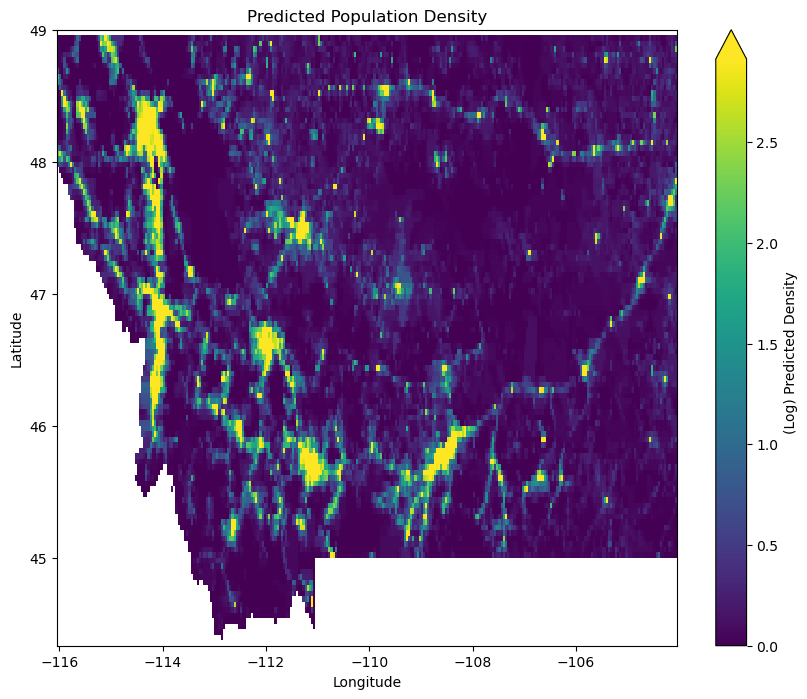

In [59]:
feat_names4 = ["NDVI", "Temperature", "Rainfall", "Aquifers"]
feature_importances4 = model4.feature_importances_
print("Feature Importances:")
for name, importance in zip(feat_names4, feature_importances4):
    print(f"{name}: {importance:.4f}")


ax4 = new_xarray4.plot(
    cmap='viridis',
    figsize=(10, 8),
    cbar_kwargs={'label': '(Log) Predicted Density'},
    robust=True,
    add_colorbar=True,
)

ax4 = plt.gca()
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.set_title('Predicted Population Density')

sdsdsdsd

X5_train_left_half shape: (13813, 4)
y5_train_left_half shape: (13813,)
Predictions shape: (32256,)
Number of non-NaN values in target: 25665
Shape mismatch between predictions and non-NaN locations!
<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 258kB
array([[[       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [0.00871655, 0.        , 0.        , ..., 0.184767  , 0.11774346, 0.12314805],
        [0.04504475, 0.01909307, 0.        , ..., 0.32768665, 0.1572912 , 0.80048917],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
    spatial_ref  int64 8B 0
  * y            (y) float64 896B 48.98 48.94 48.9 

Text(0.5, 1.0, 'Predicted Population Density')

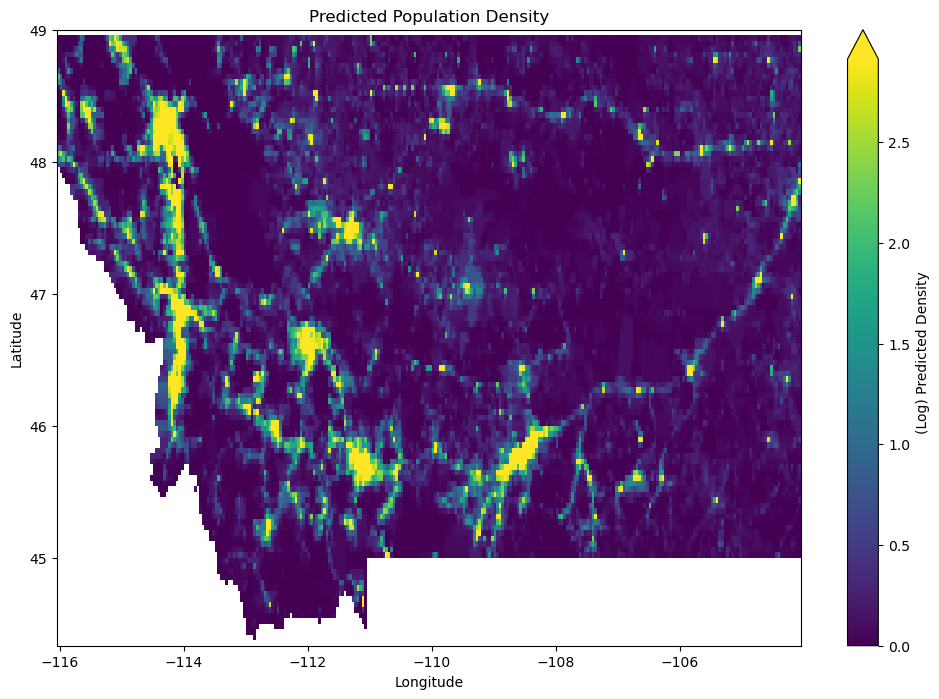

In [68]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define a smaller training area (left half of the data)
left_half_mask5 = (slice(0, 50), slice(0, 50))  # Adjust to select left half of your data

# Create a smaller subset for training (left half)
X_left_half5 = np.stack([ndvi_data_resampled.values[left_half_mask5].flatten(), 
                         tcomb_data.values[left_half_mask5].flatten(), 
                         rain_data_resampled.values[left_half_mask5].flatten(),
                         water_resampled.values[left_half_mask5].flatten()], axis=1)

y5_left_half = log_pop_data_resampled.values[left_half_mask5].flatten()

# Remove NaN values for training
mask5_left_half = ~np.isnan(y5_left_half)
X_train5_left_half = X_left_half5[mask5_left_half]
y_train5_left_half = y5_left_half[mask5_left_half]

print("X5_train_left_half shape:", X_train5_left_half.shape)
print("y5_train_left_half shape:", y_train5_left_half.shape)

# Train the model on the left half of the data
model5 = RandomForestRegressor(n_estimators=100, random_state=42)
model5.fit(X_train5_left_half, y_train5_left_half)

# Apply the model to the entire dataset (full data)
X5_full = np.stack([ndvi_data_resampled.values.flatten(), 
                    tcomb_data.values.flatten(), 
                    rain_data_resampled.values.flatten(),
                    water_resampled.values.flatten()], axis=1)

# Make predictions for the entire dataset
y_pred5_full = model5.predict(X5_full)

# Create a mask for the entire dataset (non-NaN values in log_pop_data_resampled)
mask5 = ~np.isnan(log_pop_data_resampled.values)  # Mask for the full dataset

# Verify that the number of predictions matches the number of locations
print(f"Predictions shape: {y_pred5_full.shape}")
print(f"Number of non-NaN values in target: {np.sum(mask5)}")

# Ensure we only assign predictions to the non-NaN indices
new_xarray5 = log_pop_data_resampled.copy()

# Get non-NaN indices
non_nan_indices5 = np.where(mask5)

# Assign predictions to the non-NaN locations only
# Ensure that the number of predictions matches the number of non-NaN indices
if len(y_pred5_full) == len(non_nan_indices5[0]):
    new_xarray5.values[non_nan_indices5] = y_pred5_full
else:
    print("Shape mismatch between predictions and non-NaN locations!")

# Output the updated xarray
print(new_xarray5)


# Calculate R^2 score for the entire dataset using the model trained on the left half
y_true_flat5 = log_pop_data_resampled.values.flatten()

# Apply mask to find non-NaN indices in y_true_flat
mask5 = ~np.isnan(y_true_flat5)  # Mask for non-NaN values

# Ensure y_pred5_full is also flattened and aligned with the shape of y_true_flat
y_pred5_full_flat = y_pred5_full.flatten()

# Apply the mask to get non-NaN values for both true and predicted values
y_true5 = y_true_flat5[mask5]  # Actual non-NaN values
y_pred_non_nan5 = y_pred5_full_flat[mask5]  # Predictions for the non-NaN locations

# Calculate the R^2 score
r2_5 = r2_score(y_true5, y_pred_non_nan5)

# Print the R^2 score
print(f"R^2 Score: {r2_5}")

feat_names5 = ["NDVI", "Temperature", "Rainfall", "Aquifers"]
feature_importances5 = model5.feature_importances_
print("Feature Importances:")
for name, importance in zip(feat_names5, feature_importances5):
    print(f"{name}: {importance:.4f}")


ax5 = new_xarray5.plot(
    cmap='viridis',
    figsize=(12, 8),  # Increased width for better visibility
    cbar_kwargs={'label': '(Log) Predicted Density'},
    robust=True,
    add_colorbar=True,
)

ax5 = plt.gca()
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Latitude')
ax5.set_title('Predicted Population Density')


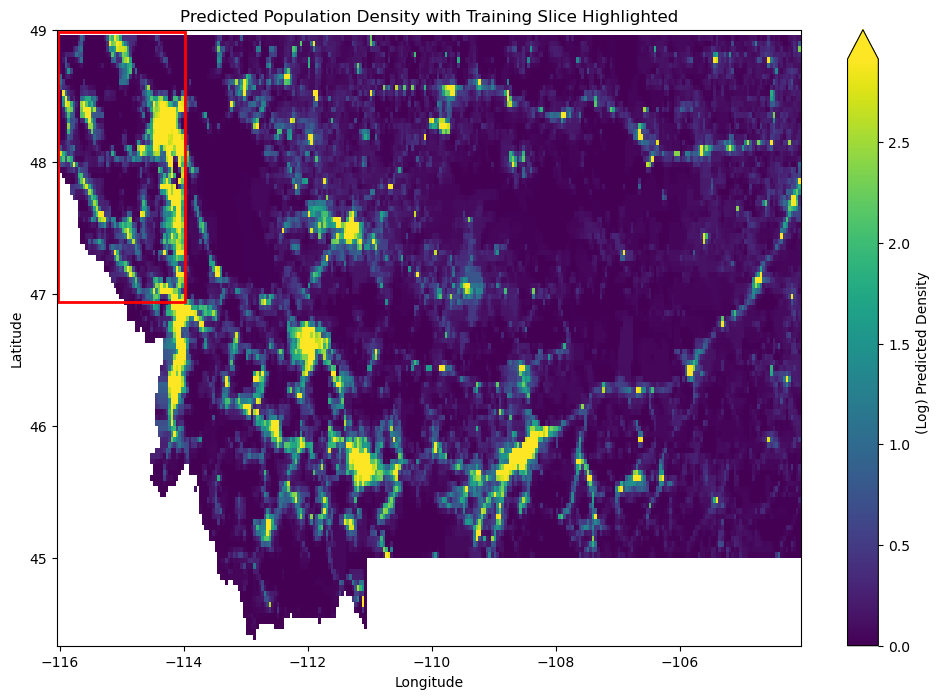

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Plot the predicted population density
ax5 = new_xarray5.plot(
    cmap='viridis',
    figsize=(12, 8),
    cbar_kwargs={'label': '(Log) Predicted Density'},
    robust=True,
    add_colorbar=True,
)

# Get coordinates for the left half slice
x_coords = new_xarray5.coords['x'].values[left_half_mask5[1]]
y_coords = new_xarray5.coords['y'].values[left_half_mask5[0]]

# Calculate the rectangle position and size based on coordinates
highlight_x = x_coords.min()
highlight_y = y_coords.min()
highlight_width = x_coords.max() - x_coords.min()
highlight_height = y_coords.max() - y_coords.min()

# Create and add the rectangle for the training area
rect = Rectangle(
    (highlight_x, highlight_y),
    highlight_width,
    highlight_height,
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)

ax5 = plt.gca()
ax5.add_patch(rect)

# Set labels and title
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Latitude')
ax5.set_title('Predicted Population Density with Training Slice Highlighted')

plt.show()